In [1]:
from qiskit import *

In [2]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [3]:
secretnumber = '101001'

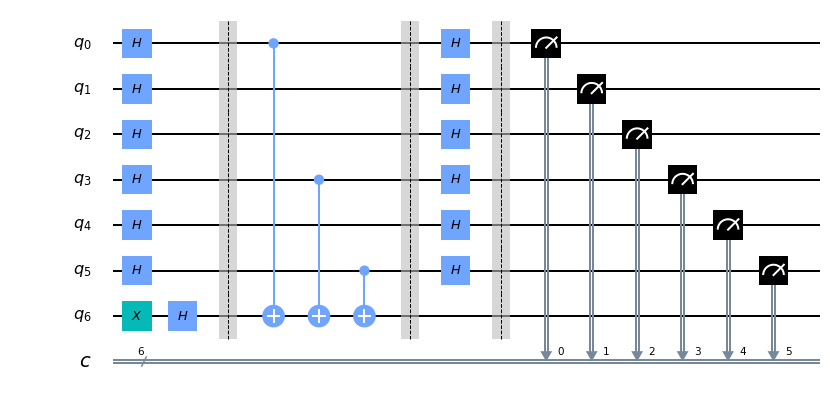

In [5]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
            circuit.cx(ii, len(secretnumber))

#circuit.cnot(5,6)
#circuit.cnot(3,6)
#circuit.cnot(0,6)

circuit.barrier()

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}
